<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Forecasting(Cocacola%20sales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
path = r"/content/CocaCola_Sales_Rawdata.xlsx"

In [21]:
data = pd.read_excel(path)

In [22]:
# Split 'Quarter' into 'Year' and 'Quarter' columns
data['Quarter'] = data['Quarter'].str.replace('Q', '')
data['Year'], data['Quarter'] = data['Quarter'].str.split('_').str

# Convert 'Year' and 'Quarter' columns to datetime format
data['Quarter'] = pd.to_datetime(data['Quarter'], format='%m', errors='coerce')
data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce')

# Set 'Quarter' as the index
data['Quarter'] = data['Year'] + pd.offsets.QuarterEnd()
data.set_index('Quarter', inplace=True)

# Drop the temporary column 'Year'
data.drop(columns=['Year'], inplace=True)

<ipython-input-22-f39501bbd3d1>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Year'], data['Quarter'] = data['Quarter'].str.split('_').str


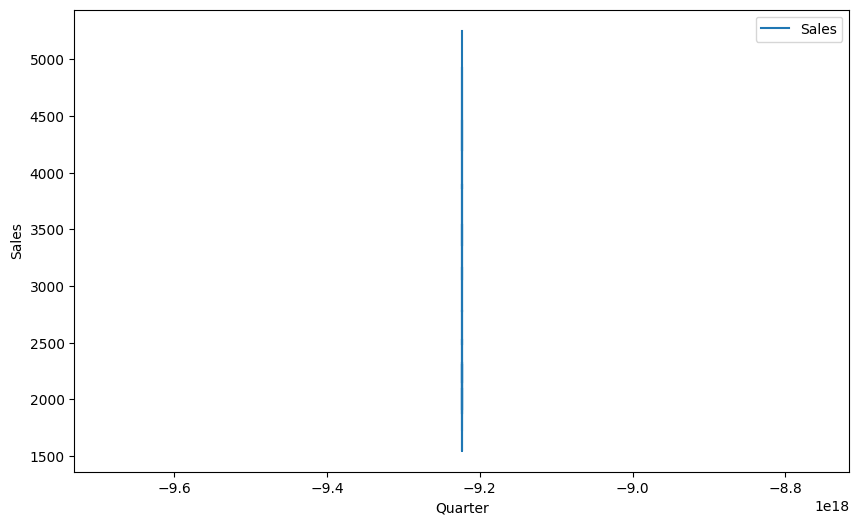

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [24]:
result = seasonal_decompose(data, model='additive', period=4)

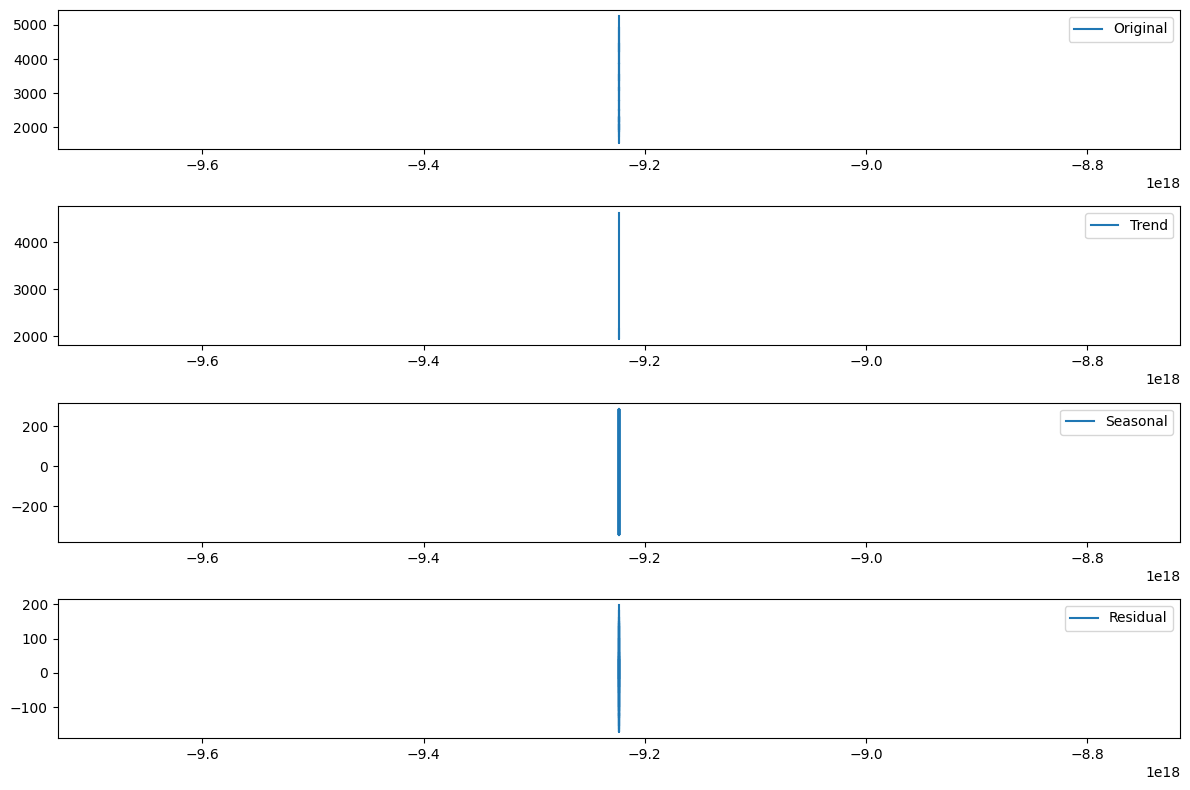

In [25]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Original')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
def adf_test(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")

adf_test(data['Sales'])

ADF Statistic: 1.309421015326811
p-value: 0.9966611673930905
Critical Values:
1%: -3.639224104416853
5%: -2.9512301791166293
10%: -2.614446989619377


In [28]:
sma_window = 4
data['SMA'] = data['Sales'].rolling(window=sma_window).mean()

In [29]:
ema_window = 4
data['EMA'] = data['Sales'].ewm(span=ema_window, adjust=False).mean()

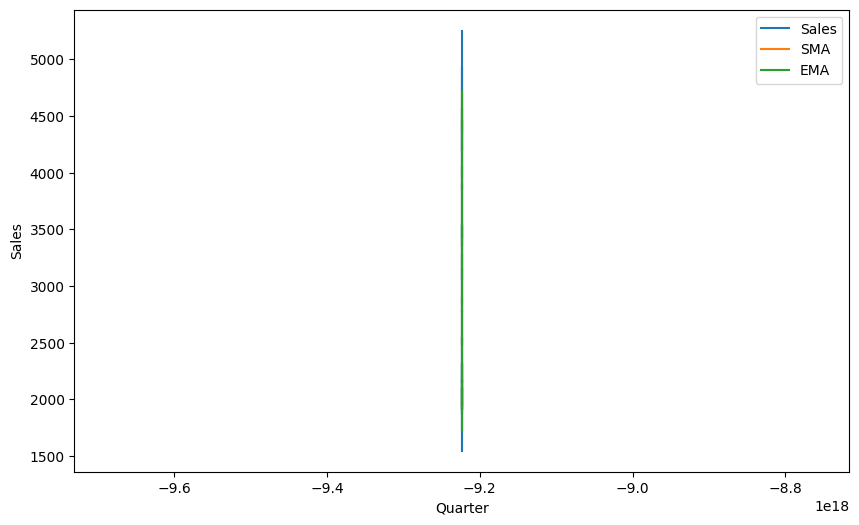

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Sales')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['EMA'], label='EMA')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [31]:
model = ARIMA(data['Sales'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [33]:
n_forecast = 4
forecast = model_fit.forecast(steps=n_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [34]:
rmse_arima = np.sqrt(mean_squared_error(data['Sales'][-n_forecast:], forecast))
print("RMSE for ARIMA:", rmse_arima)

RMSE for ARIMA: 455.3023314588672
